# Laboratorio 3
- Juan Pablo Solis
- Brandon Reyes
- Carlos Valladares

# Task 1 - Preguntas Teoricas

- Explique la diferencia entre descenso de gradiente, descenso de gradiente por mini batches y descenso de gradiente estocástico. Asegúrese de mencionar las ventajas y desventajas de cada enfoque.
    - Descenso de gradiente: Este método actualiza los parámetros calculando el gradiente sobre todo el conjunto de datos. Es preciso pero lento para grandes datasets, ya que requiere procesar todos los datos en cada iteración.
    - Descenso por mini batches: Divide el conjunto de datos en pequeños lotes (mini batches) y actualiza los parámetros usando el gradiente de cada lote. Es un equilibrio entre precisión y eficiencia, pero su rendimiento depende del tamaño del lote.
    - Descenso estocástico: Actualiza los parámetros usando el gradiente de un solo ejemplo por iteración. Es más rápido, pero puede ser menos estable, lo que resulta en fluctuaciones en el valor de la función objetivo.
- Compare y contraste técnicas de extracción de features (feature extraction) y selección de features (feature selection) en machine learning. Dé ejemplos de escenarios donde cada técnica sería más apropiada.
    - Extracción de features: Transforma los datos originales en nuevas representaciones (ej., reducción de dimensionalidad con PCA). Es útil cuando los datos son complejos y requieren representaciones más manejables, como en imágenes o texto.
    - Selección de features: Escoge un subconjunto de las características originales basándose en su relevancia (ej., filtrado por correlación). Es adecuada cuando se quiere interpretar el modelo y reducir el ruido en datasets con muchas variables irrelevantes.
-  Describa la arquitectura y el funcionamiento de un perceptrón de una sola capa (un tipo de red neuronal sin backpropagation). Explique cómo aprende y la forma en la que actualiza sus parámetros.
    - Un perceptrón de una sola capa es una red neuronal básica que consiste en una capa de entrada y una salida. Aplica una función de activación para tomar decisiones binarias. Este aprende ajustando los pesos mediante una regla de actualizacicon basada en el error de prediccion.


# Task 2.1 Gradiente Descendiente Estocástico.

In [135]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [136]:
np.random.seed(42)
x_data = np.linspace(-2, 3, 100)
coeficientes = [2, -3, 5, 3]  # Coeficientes del polinomio en orden descendente
y_real = np.polyval(coeficientes, x_data)
y_data = y_real + np.random.normal(0, 4, 100)

Polonomio = np.poly1d(coeficientes)
derivative = np.polyder(Polonomio)


In [137]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Implementación del Gradiente Descendente
def gradient_descent_v2(x, y, deriv, lr=0.00005, max_iter=1000):
    coeffs = np.random.randn(4)  
    mse_list = []
    start = time.time()
    
    for _ in range(max_iter):
        predictions = np.polyval(coeffs, x)
        gradient = np.mean([(predictions[i] - y[i]) * deriv(x[i]) for i in range(len(x))], axis=0)
        coeffs -= lr * gradient  
        mse_list.append(mean_squared_error(y, predictions))  
    
    exec_time = time.time() - start
    final_mse = mse_list[-1]
    print(f"Gradiente Descendente finalizado en {exec_time:.4f} segundos. Error final: {final_mse:.4f}")
    return coeffs, mse_list, exec_time

# Ejecutar Gradiente Descendente
coefficients_gd, errors_gd, time_gd = gradient_descent_v2(x_data, y_data, derivative)


Gradiente Descendente finalizado en 1.6593 segundos. Error final: 215.1672


In [138]:
def stochastic_gradient_descent(x, y, deriv, lr=0.00005, max_iter=1000):
    coeffs = np.random.randn(4)  
    mse_list = []
    start = time.time()
    
    for _ in range(max_iter):
        for i in range(len(x)):  
            prediction = np.polyval(coeffs, x[i])
            gradient = (prediction - y[i]) * deriv(x[i])
            coeffs -= lr * gradient  
        
        mse_list.append(mean_squared_error(y, np.polyval(coeffs, x)))  
        
    exec_time = time.time() - start
    final_mse = mse_list[-1]
    print(f"Gradiente Descendente Estocástico finalizado en {exec_time:.4f} segundos. Error final: {final_mse:.4f}")
    return coeffs, mse_list, exec_time

# Ejecutar Gradiente Descendente Estocástico
coefficients_sgd, errors_sgd, time_sgd = stochastic_gradient_descent(x_data, y_data, derivative)


Gradiente Descendente Estocástico finalizado en 3.9152 segundos. Error final: 107.5625


In [139]:
# Implementación del Gradiente Descendente por Mini-Batches
def mini_batch_gradient_descent(x, y, deriv, lr=0.00005, max_iter=1000, batch_size=10):
    coeffs = np.random.randn(4)  
    mse_list = []
    start = time.time()
    
    for _ in range(max_iter):
        indices = np.random.permutation(len(x))  
        for i in range(0, len(x), batch_size):
            batch_indices = indices[i:i + batch_size]
            x_batch = x[batch_indices]
            y_batch = y[batch_indices]
            
            predictions = np.polyval(coeffs, x_batch)
            gradient = np.mean([(predictions[j] - y_batch[j]) * deriv(x_batch[j]) for j in range(len(x_batch))], axis=0)
            coeffs -= lr * gradient  
        
        mse_list.append(mean_squared_error(y, np.polyval(coeffs, x)))  
        
    exec_time = time.time() - start
    final_mse = mse_list[-1]
    print(f"Gradiente Descendente Mini-Batch finalizado en {exec_time:.4f} segundos. Error final: {final_mse:.4f}")
    return coeffs, mse_list, exec_time

# Ejecutar Gradiente Descendente Mini-Batch
coefficients_mb, errors_mb, time_mb = mini_batch_gradient_descent(x_data, y_data, derivative)


Gradiente Descendente Mini-Batch finalizado en 1.9187 segundos. Error final: 206.3180


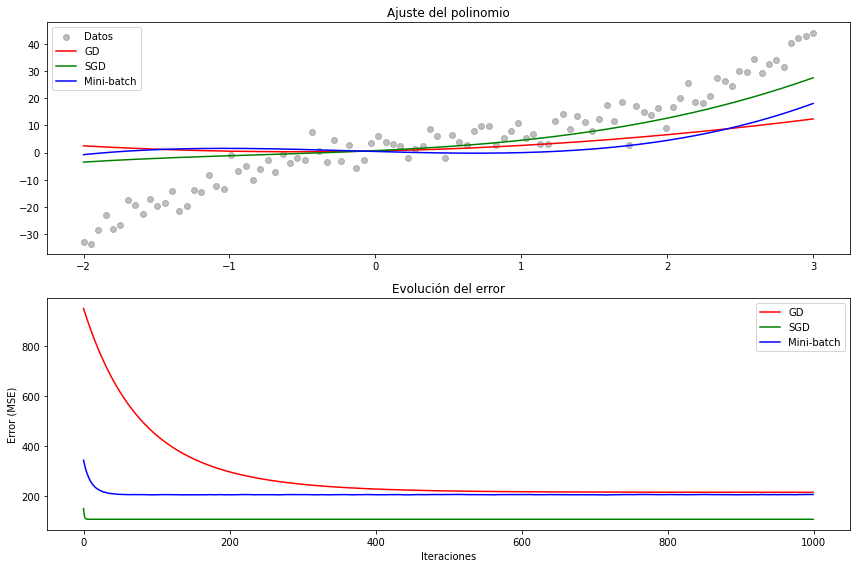

In [140]:
import matplotlib.pyplot as plt
# Graficar resultados
plt.figure(figsize=(12, 8))

# Gráfica de ajuste del polinomio
plt.subplot(2, 1, 1)
plt.scatter(x_data, y_data, color='gray', alpha=0.5, label='Datos')
x_plot = np.linspace(min(x_data), max(x_data), 200)
plt.plot(x_plot, np.polyval(coefficients_gd, x_plot), 'r-', label='GD')
plt.plot(x_plot, np.polyval(coefficients_sgd, x_plot), 'g-', label='SGD')
plt.plot(x_plot, np.polyval(coefficients_mb, x_plot), 'b-', label='Mini-batch')
plt.legend()
plt.title('Ajuste del polinomio')

# Gráfica de evolución del error (MSE)
plt.subplot(2, 1, 2)
plt.plot(errors_gd, 'r-', label='GD')
plt.plot(errors_sgd, 'g-', label='SGD')
plt.plot(errors_mb, 'b-', label='Mini-batch')
plt.xlabel('Iteraciones')
plt.ylabel('Error (MSE)')
plt.legend()
plt.title('Evolución del error')

plt.tight_layout()
plt.show()


###     ¿Cual fue el metodo más rapido?
- El metodo más rapido fue el Gradiente Descendente debido a que el cálculo del gradiente se realiza utilizando todos los datos a la vez, lo que permite hacer una sola actualización por iteración.
- El Gradiente Descendente Estocástico (SGD) es el mejor método en términos de fitness porque alcanzó el menor error final (107.56 MSE), lo que indica que se ajustó mejor al polinomio real. Sin embargo, esto tiene un costo en tiempo de ejecución, ya que fue el más lento

# Task 2.3 - Perceptrón

In [141]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [142]:
# Cargar el dataset de Iris
iris = load_iris()
X = iris.data[:, [0, 1]]  # Seleccionamos las características: sepal length y sepal width
y = (iris.target == 0).astype(int)  # Clasificación binaria: Setosa vs. No-Setosa

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarización de los datos para mejorar la convergencia del Perceptrón
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [143]:
# Implementación del Perceptrón
class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            for i in range(n_samples):
                linear_output = np.dot(X[i], self.weights) + self.bias
                y_pred = 1 if linear_output >= 0 else 0

                # Actualización de pesos y bias según la regla de aprendizaje del perceptrón
                update = self.learning_rate * (y[i] - y_pred)
                self.weights += update * X[i]
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, 0)
    
# Entrenar el Perceptrón
perceptron = Perceptron(learning_rate=0.01, epochs=1000)
perceptron.fit(X_train, y_train)

# Evaluar el desempeño
y_pred = perceptron.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Precisión del Perceptrón: {accuracy:.2f}")

Precisión del Perceptrón: 1.00


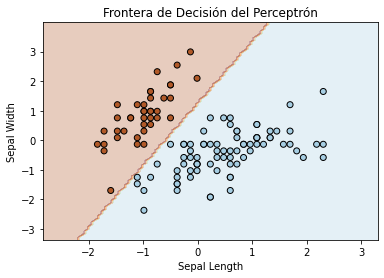

In [144]:
# Visualización de la frontera de decisión
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Frontera de Decisión del Perceptrón")
plt.show()